In [1]:
import numpy as np

In [3]:
print(np.version)

<module 'numpy.version' from 'C:\\Users\\ikram\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\numpy\\version.py'>


In [4]:
from keras.layers import SimpleRNN

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32),)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
from keras.datasets import imdb
from keras import preprocessing

In [8]:
max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)



In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

NameError: name 'input_train' is not defined

In [10]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

NameError: name 'input_train' is not defined

In [32]:
pip install -U numpy==1.18.5

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ikram\\anaconda3\\envs\\tensorflow\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [11]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)


In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6684 - acc: 0.6231 - val_loss: 0.6177 - val_acc: 0.7038
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5418 - acc: 0.7520 - val_loss: 0.5242 - val_acc: 0.7346
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4599 - acc: 0.7916 - val_loss: 0.4998 - 

In [9]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)



In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6691 - acc: 0.6233 - val_loss: 0.6166 - val_acc: 0.7062
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.5395 - acc: 0.7518 - val_loss: 0.5220 - val_acc: 0.7346
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4595 - acc: 0.7882 - val_loss: 0.4965 - 

In [13]:
import os

imdb_dir = 'C:/Users/ikram/Desktop/piaic practice/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="UTF-8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [16]:
glove_dir = 'D:/AI PIAIC/Deep Learning data'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [17]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector



In [18]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 155ms/step - loss: 1.5865 - acc: 0.4600 - val_loss: 0.7225 - val_acc: 0.5026
Epoch 2/10
7/7 [==============================] - 1s 123ms/step - loss: 0.6398 - acc: 0.5950 - val_loss: 0.7339 - val_acc: 0.5028
Epoch 3/10
7/7 [==============================] - 1s 131ms/step - loss: 0.5266 - acc: 0.6550 - val_loss: 0.6970 - val_acc: 0.5118
Epoch 4/10
7/7 [==============================] - 1s 154ms/step - loss: 0.6255 - acc: 0.6900 - val_loss: 0.9590 - val_acc: 0.5036
Epoch 5/10
7/7 [==============================] - 1s 165ms/step - loss: 0.3438 - acc: 0.8600 - val_loss: 0.6989 - val_acc: 0.5576
Epoch 6/10
7/7 [==============================] - 1s 146ms/step - loss: 0.1839 - acc: 0.9900 - val_loss: 0.7110 - val_acc: 0.5547
Epoch 7/10
7/7 [==============================] - 1s 132ms/step - loss: 0.2031 - acc: 0.9550 - val_loss: 1.6542 - val_acc: 0.5033
Epoch 8/10
7/7 [==============================] - 1s 156ms/step - loss: 0.1496 - acc: 0.96

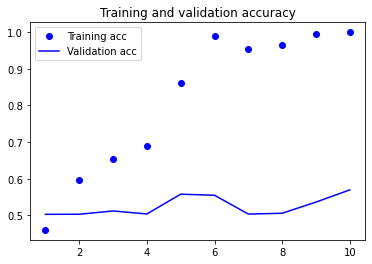

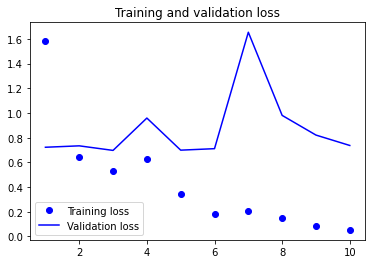

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 170ms/step - loss: 0.6934 - acc: 0.5100 - val_loss: 0.6925 - val_acc: 0.5183
Epoch 2/10
7/7 [==============================] - 1s 139ms/step - loss: 0.4974 - acc: 0.9850 - val_loss: 0.6963 

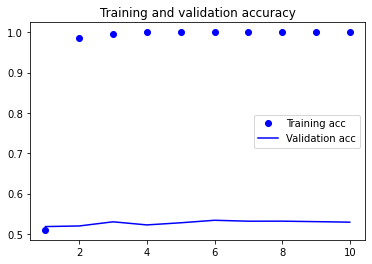

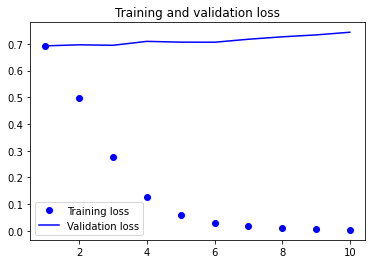

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="UTF-8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

NameError: name 'os' is not defined

In [3]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t  = np.zeros((output_features,))

W = np.random.random((output_features,input_features))
U = np.random.random((output_features,output_features))
b = np.random.random((output_features,))

successive_outputs =[]
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    successive_outputs.append(output_t)
    
    state_t = output_t
    
final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [6]:
print(inputs)

[[0.51625961 0.06215439 0.33657292 ... 0.95545737 0.45475084 0.48280005]
 [0.56936035 0.96033643 0.63388279 ... 0.00828804 0.83267887 0.30829298]
 [0.86100301 0.77655642 0.34423739 ... 0.29372756 0.46279121 0.9323758 ]
 ...
 [0.29160755 0.07605541 0.88849919 ... 0.41863021 0.18386419 0.30609639]
 [0.25744535 0.6055036  0.69064251 ... 0.59787848 0.11527583 0.72207979]
 [0.04369868 0.53779071 0.55648019 ... 0.33710589 0.99470036 0.23090969]]


In [7]:
print(state_t)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
W

array([[0.78045777, 0.59998386, 0.00540502, ..., 0.03745813, 0.24681066,
        0.59461156],
       [0.69784738, 0.84889394, 0.07241151, ..., 0.61863791, 0.54299753,
        0.25092926],
       [0.30961029, 0.54923405, 0.73325224, ..., 0.77260707, 0.07498111,
        0.85271324],
       ...,
       [0.44956798, 0.09777331, 0.75469347, ..., 0.40209736, 0.31021753,
        0.28368776],
       [0.57797019, 0.90569166, 0.56876729, ..., 0.82773456, 0.76858143,
        0.55398045],
       [0.17387857, 0.58941875, 0.01776367, ..., 0.09116369, 0.53285702,
        0.79334222]])

In [9]:
b

array([6.11940152e-02, 7.40819517e-02, 2.38311502e-01, 2.61383490e-01,
       5.22698979e-01, 6.17689360e-01, 6.15682226e-01, 6.63157023e-01,
       4.94958651e-01, 5.16352792e-01, 6.29506831e-01, 5.19372771e-01,
       3.99447919e-01, 5.63726292e-02, 2.42346101e-01, 8.45026355e-01,
       4.25067817e-01, 7.19142026e-01, 5.06727056e-01, 8.84480423e-01,
       7.84722835e-01, 6.10797521e-01, 3.85333908e-04, 9.02655433e-01,
       6.61284994e-01, 8.20818088e-01, 9.97045402e-01, 7.56349611e-01,
       3.94950083e-01, 2.34121841e-01, 7.91756293e-01, 8.21607317e-01,
       3.55657182e-01, 8.27644523e-01, 7.86230241e-01, 9.02474073e-01,
       4.70032387e-01, 1.00850970e-01, 6.49872856e-01, 4.18400818e-01,
       8.27313687e-02, 3.95035724e-01, 5.96670511e-01, 7.80279907e-01,
       3.33349805e-01, 1.55838516e-02, 5.69004451e-01, 1.93007517e-01,
       6.38423135e-01, 9.00346653e-01, 5.42118254e-02, 4.76807363e-01,
       8.58914028e-01, 5.51708349e-01, 9.32214376e-01, 6.22441200e-02,
      

In [11]:
len(successive_outputs)

100

In [12]:
len(final_output_sequence)

6400

In [15]:
np.shape(final_output_sequence)

(6400,)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

In [14]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________
